In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh


/home/users/mmuetz/miniforge3/envs/regrid2hp_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
ds = xr.open_zarr('/gws/nopw/j04/hrcm/mmuetz/Lorenzo_u-cu087/pe_T/healpix/experimental_20200101T0000Z_pe.hpz0-10.full1.zarr')

In [3]:
ds

<xarray.Dataset> Size: 2TB
Dimensions:                  (time: 1461, pressure: 10, cell_4: 3072,
                              cell_5: 12288, cell_2: 192, cell_10: 12582912,
                              cell_0: 12, cell_9: 3145728, cell_1: 48,
                              cell_8: 786432, cell_7: 196608, cell_3: 768,
                              cell_6: 49152)
Coordinates: (12/15)
  * cell_2                   (cell_2) int64 2kB 0 1 2 3 4 ... 188 189 190 191
  * pressure                 (pressure) float32 40B 200.0 250.0 ... 950.0 1e+03
  * cell_9                   (cell_9) int64 25MB 0 1 2 ... 3145726 3145727
  * cell_8                   (cell_8) int64 6MB 0 1 2 3 ... 786429 786430 786431
    forecast_reference_time  datetime64[ns] 8B ...
  * cell_5                   (cell_5) int64 98kB 0 1 2 3 ... 12285 12286 12287
    ...                       ...
  * cell_10                  (cell_10) int64 101MB 0 1 2 ... 12582910 12582911
  * cell_7                   (cell_7) int64 2MB 0 1 2 3 ... 196605 196606 196607
  * cell_6                   (cell_6) int64 393kB 0 1 2 3 ... 49149 49150 49151
  * cell_1                   (cell_1) int64 384B 0 1 2 3 4 5 ... 43 44 45 46 47
    forecast_period          (time) timedelta64[ns] 12kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                     (time) datetime64[ns] 12kB 2020-01-01 ... 2021-0...
Data variables:
    air_temperature_4        (time, pressure, cell_4) float64 359MB dask.array<chunksize=(1, 10, 3072), meta=np.ndarray>
    air_temperature_5        (time, pressure, cell_5) float64 1GB dask.array<chunksize=(1, 10, 12288), meta=np.ndarray>
    air_temperature_10       (time, pressure, cell_10) float64 1TB dask.array<chunksize=(1, 10, 12582912), meta=np.ndarray>
    air_temperature_0        (time, pressure, cell_0) float64 1MB dask.array<chunksize=(1, 10, 12), meta=np.ndarray>
    air_temperature_9        (time, pressure, cell_9) float64 368GB dask.array<chunksize=(1, 10, 3145728), meta=np.ndarray>
    air_temperature_1        (time, pressure, cell_1) float64 6MB dask.array<chunksize=(1, 10, 48), meta=np.ndarray>
    air_temperature_8        (time, pressure, cell_8) float64 92GB dask.array<chunksize=(1, 10, 786432), meta=np.ndarray>
    air_temperature_7        (time, pressure, cell_7) float64 23GB dask.array<chunksize=(1, 10, 196608), meta=np.ndarray>
    air_temperature_6        (time, pressure, cell_6) float64 6GB dask.array<chunksize=(1, 10, 49152), meta=np.ndarray>
    air_temperature_3        (time, pressure, cell_3) float64 90MB dask.array<chunksize=(1, 10, 768), meta=np.ndarray>
    air_temperature_2        (time, pressure, cell_2) float64 22MB dask.array<chunksize=(1, 10, 192), meta=np.ndarray>
Attributes:
    standard_name:    air_temperature
    units:            K
    um_stash_source:  m01s16i203
    grid_mapping:     healpix_nested
    input_file:       /gws/nopw/j04/hrcm/cache/torau/Lorenzo_u-cu087/pe_T/202...
    suite:            u-cu087

In [56]:
def plot_hp(da, title, units, **plot_kwargs):
    # Setting dpi sets the resolution of the lat/lon interp'd data.
    # kwargs = {'dpi': 500, 'cmap': cmocean.cm.thermal}
    plot_kwargs.update({'cmap': cmocean.cm.thermal})
    if 'dpi' not in plot_kwargs:
        plot_kwargs['dpi'] = 200

    projection = ccrs.PlateCarree()
    figsize = (8, 4)

    fig, ax = plt.subplots(
        figsize=figsize, subplot_kw={"projection": projection}, constrained_layout=True
    )
    ax.set_global()
    mean = da.mean().compute()
    ax.set_title(f'{title}, global mean = {mean:.8f} {units}')

    egh.healpix_show(da, ax=ax, **plot_kwargs)
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
    return fig, ax

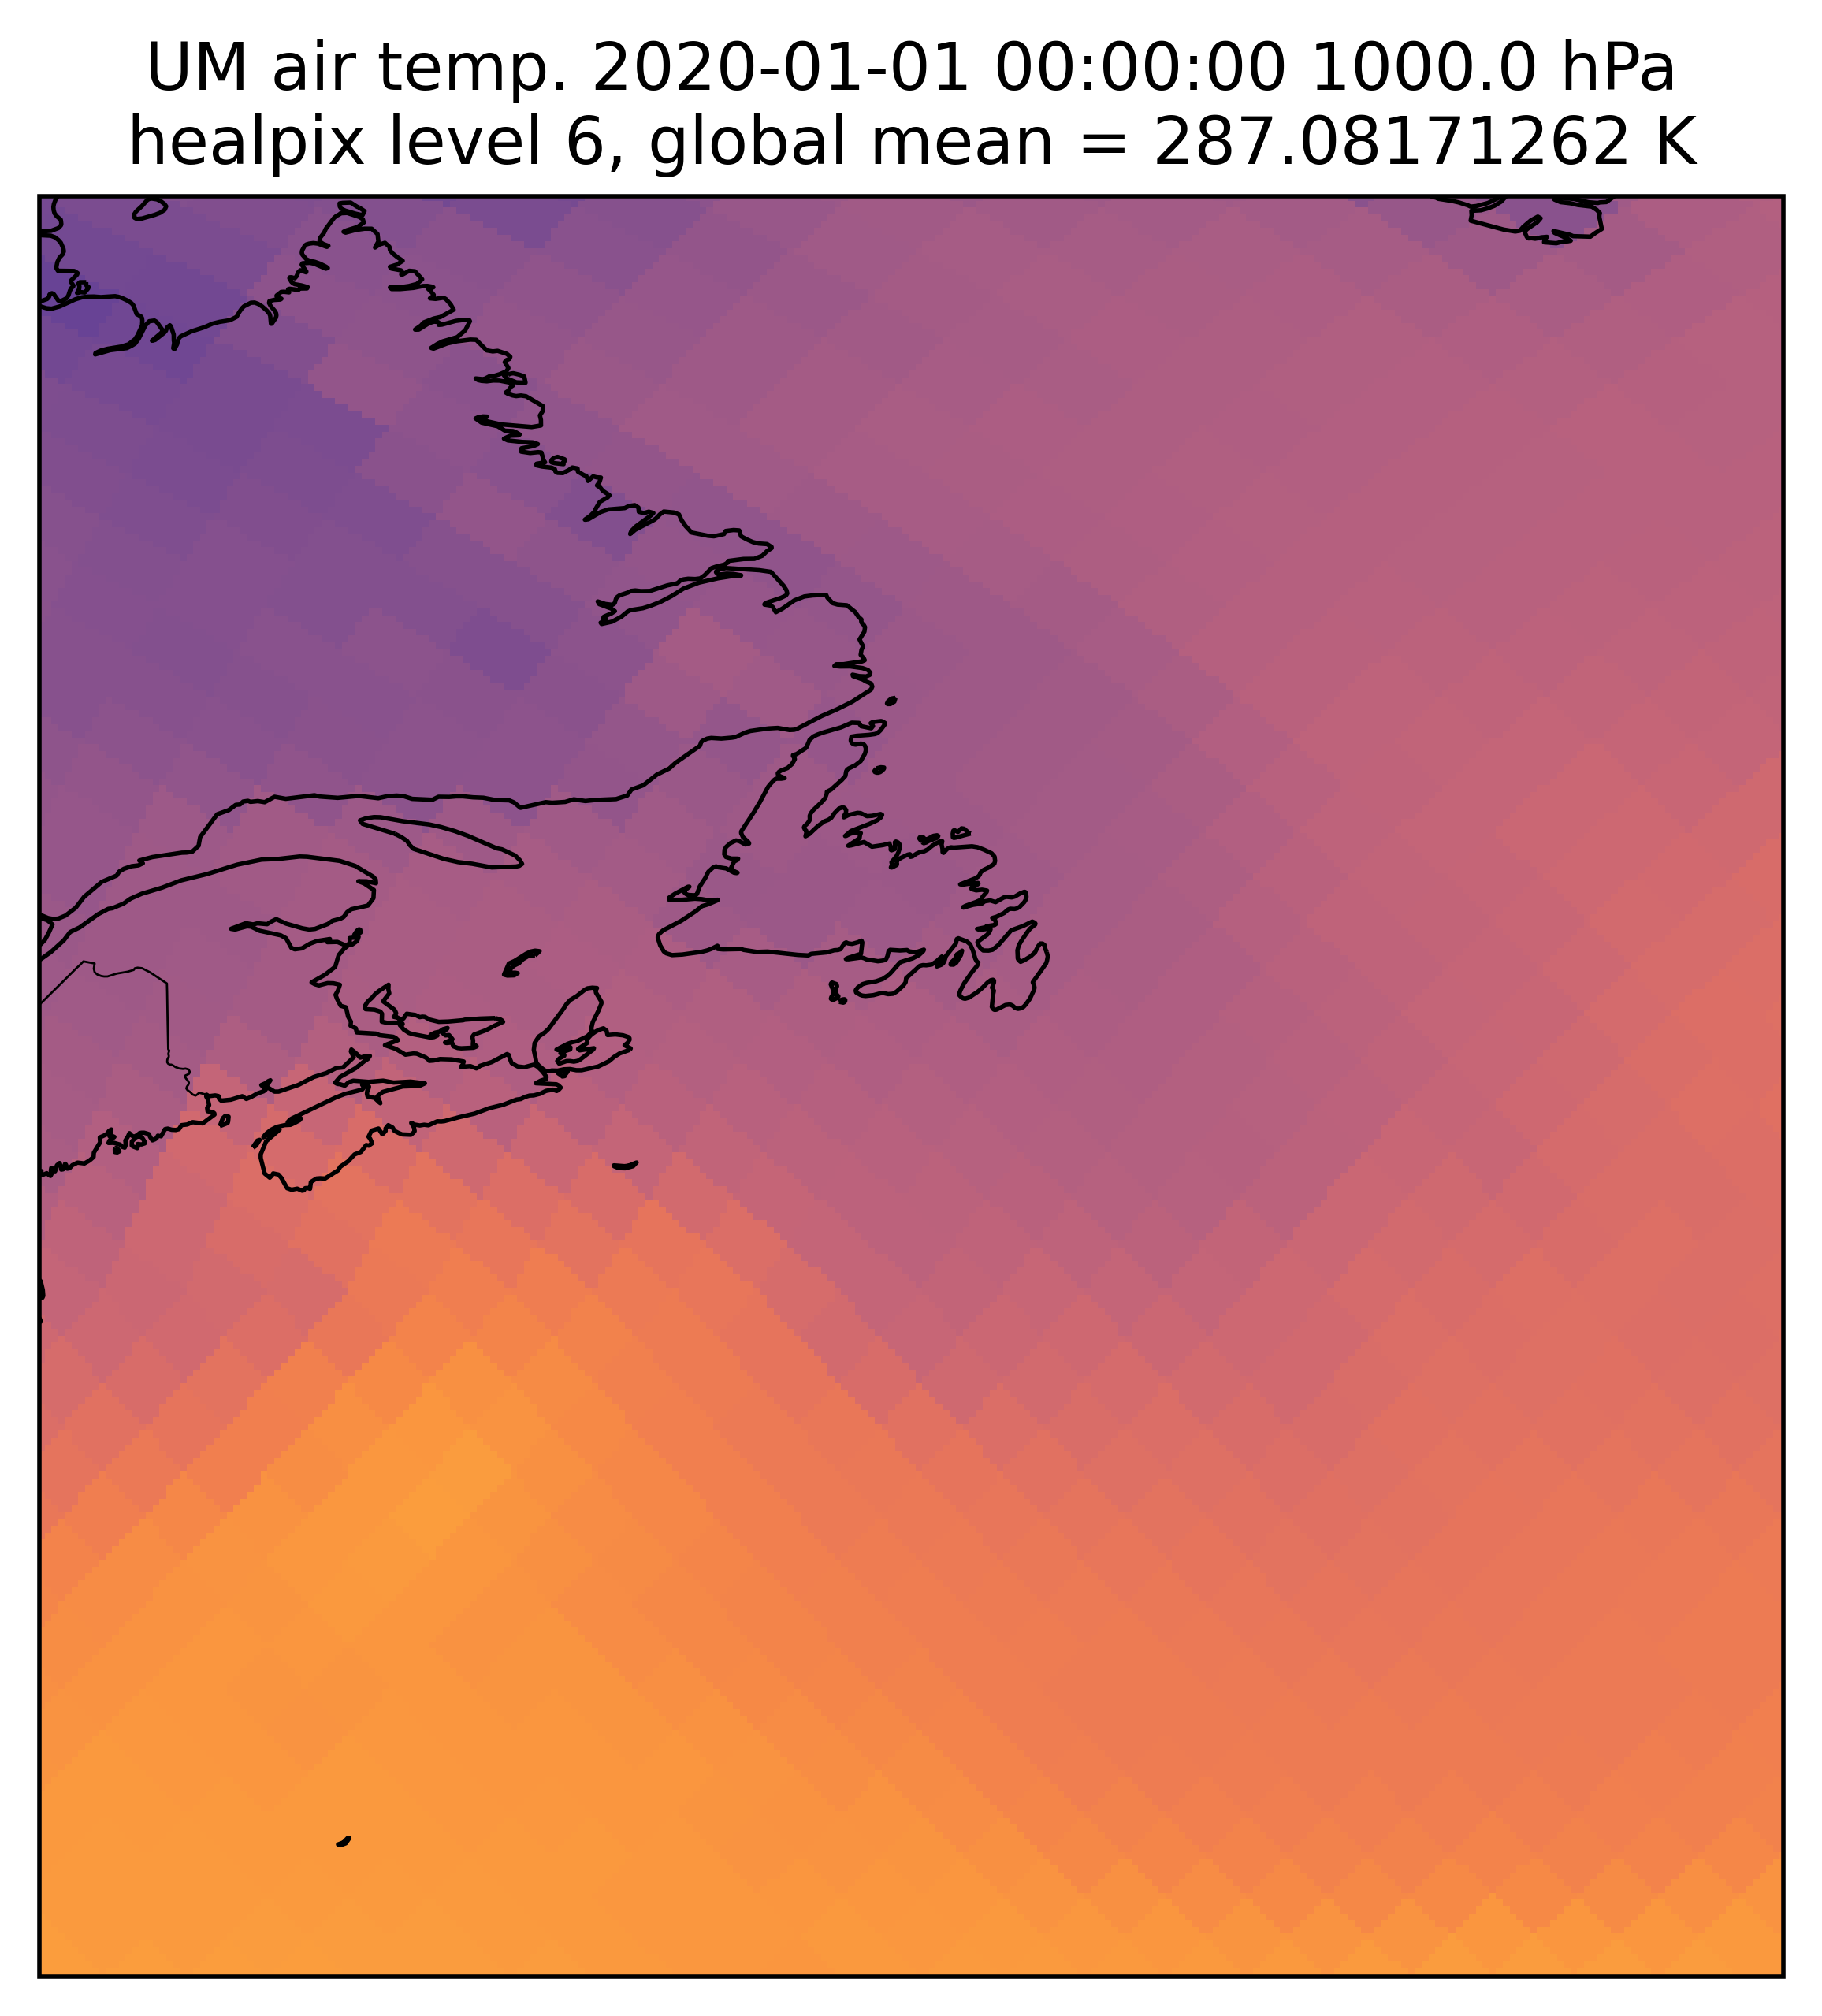

In [57]:
level = 6
da = ds.isel(time=0, pressure=-1)[f'air_temperature_{level}']
time = pd.Timestamp(da.time.values.item())
pressure = da.pressure.values.item()
fig, ax = plot_hp(da, f'UM air temp. {time} {pressure} hPa\nhealpix level {level}', 'K', dpi=500)
fig.set_size_inches(5, 5)
ax.set_extent((-70, -40, 30, 60))

In [58]:
pd.Timestamp(ds.isel(time=0, pressure=0).air_temperature_6.time.values.item())
ds.isel(time=0, pressure=-1).pressure.values.item()

1000.0

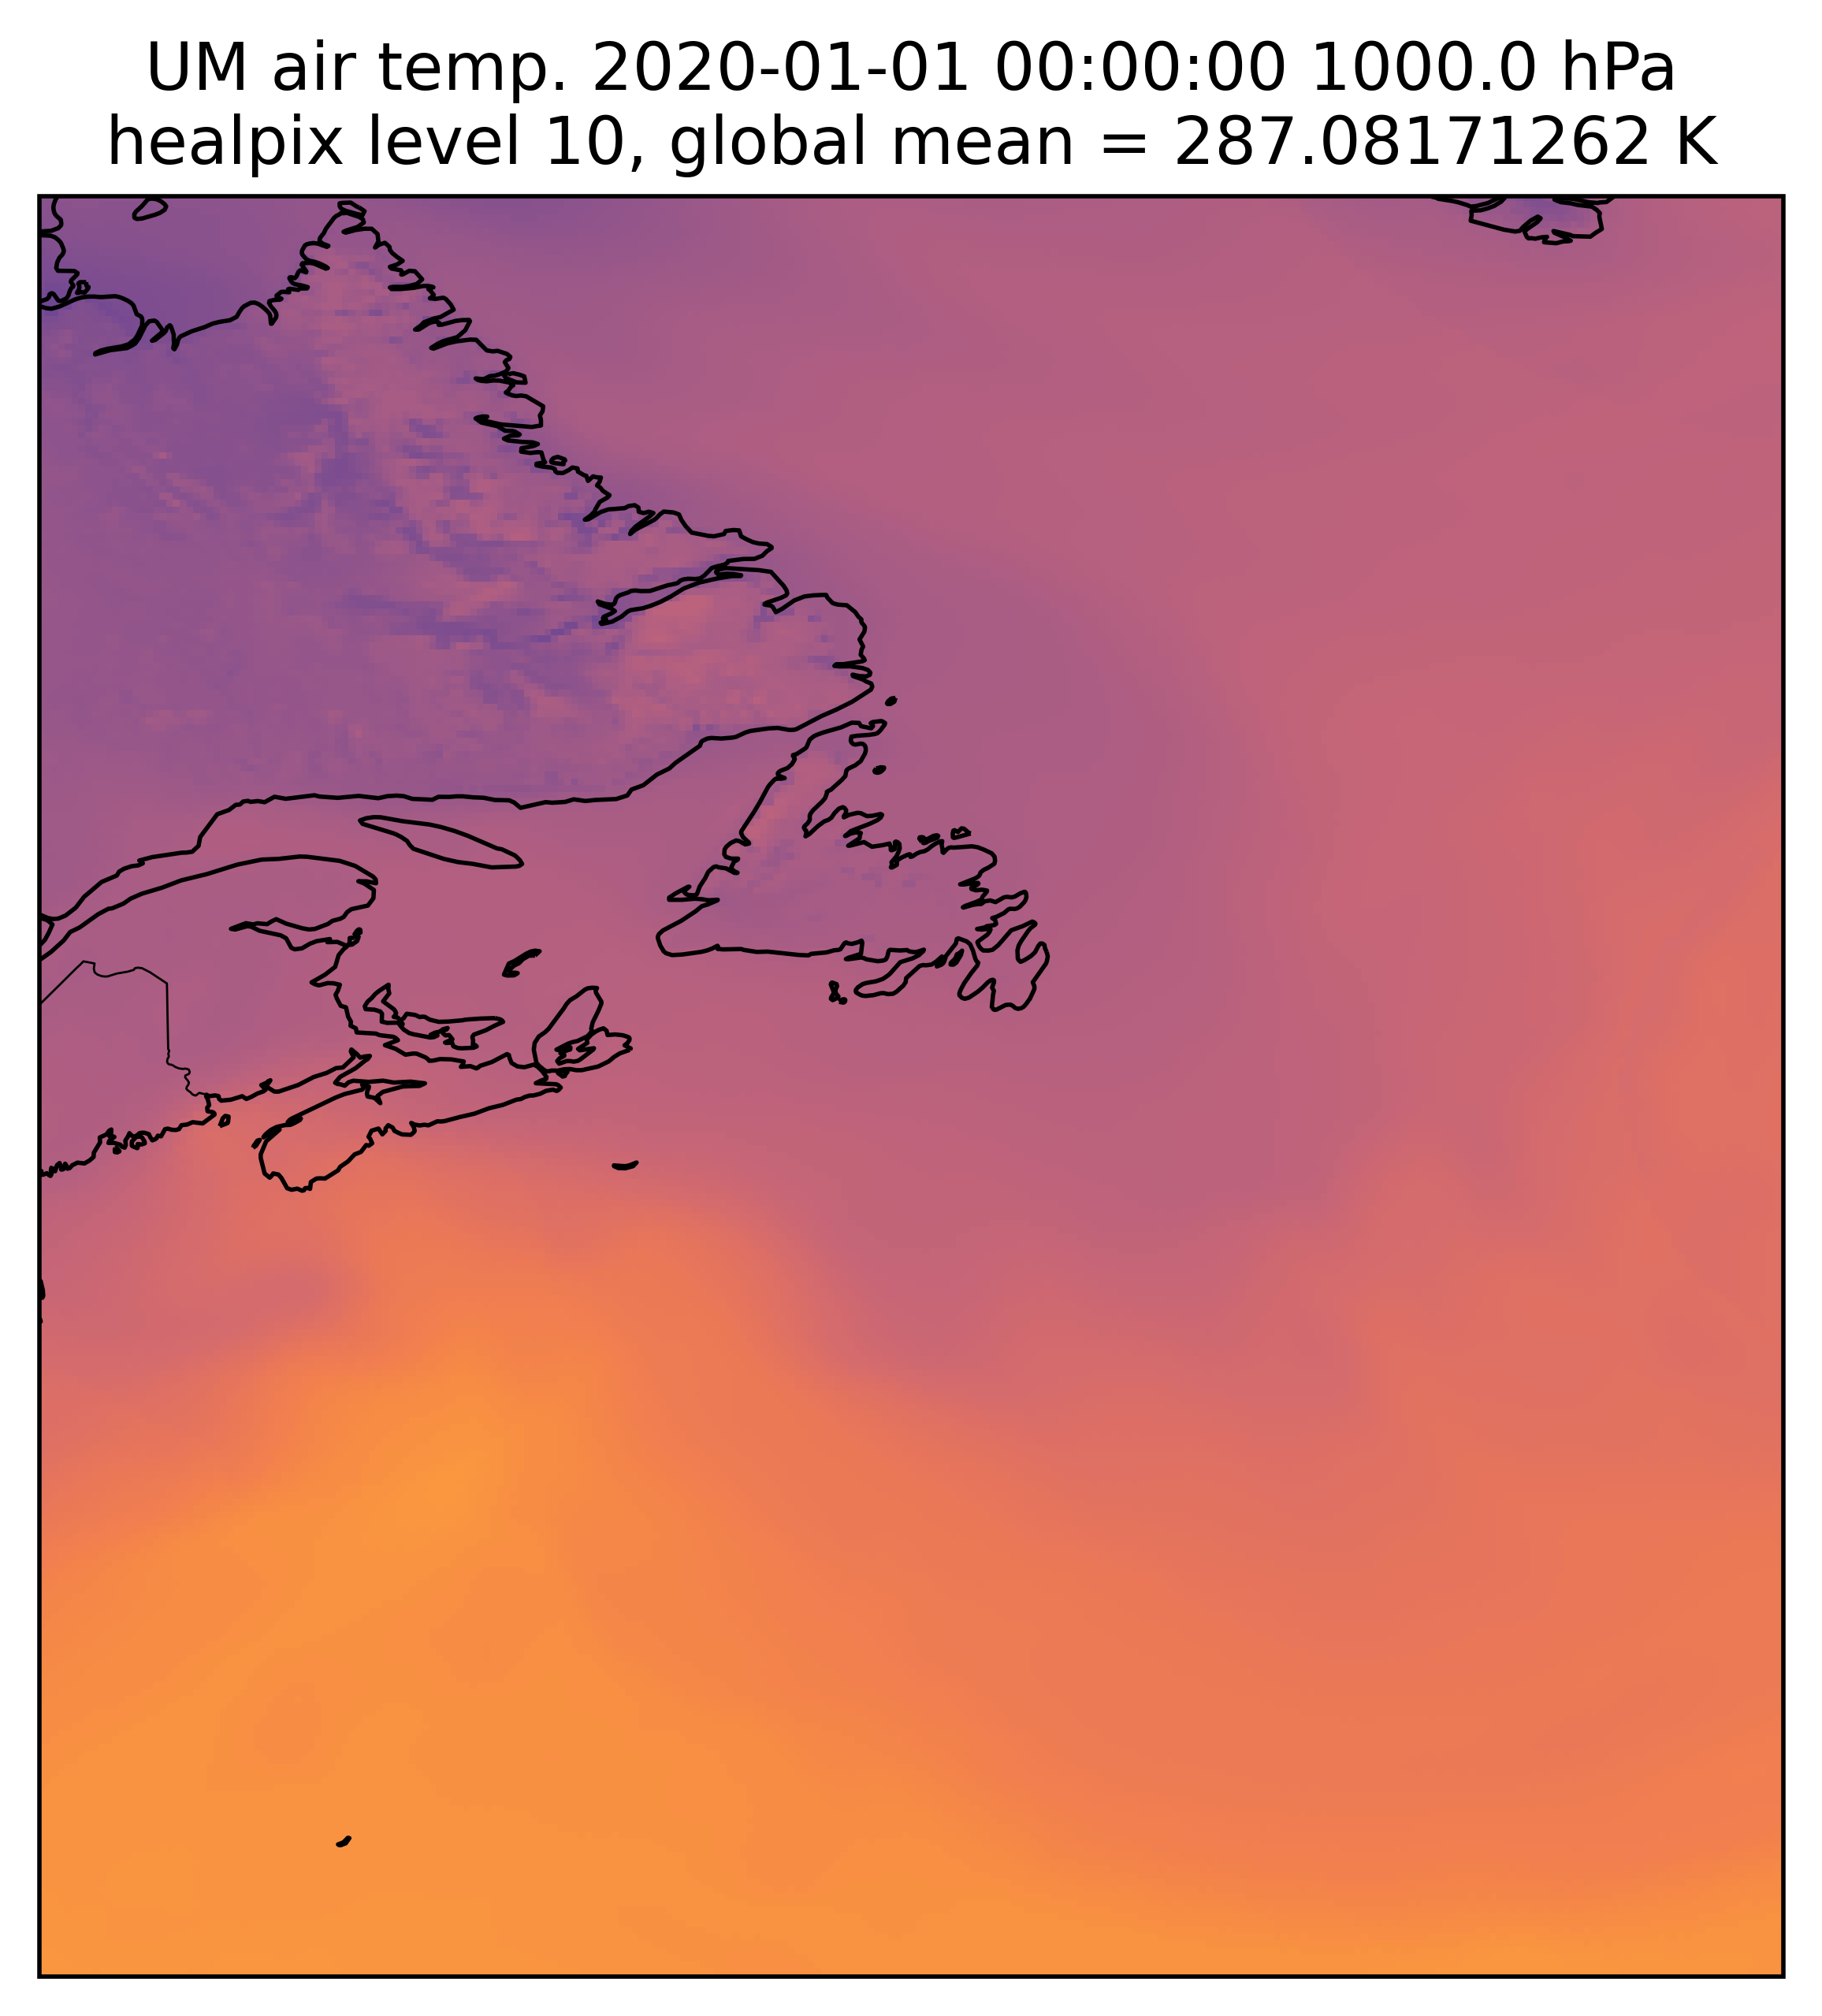

In [59]:
level = 10
da = ds.isel(time=0, pressure=-1)[f'air_temperature_{level}']
time = pd.Timestamp(da.time.values.item())
pressure = da.pressure.values.item()
fig, ax = plot_hp(da, f'UM air temp. {time} {pressure} hPa\nhealpix level {level}', 'K', dpi=500)
fig.set_size_inches(5, 5)
ax.set_extent((-70, -40, 30, 60))


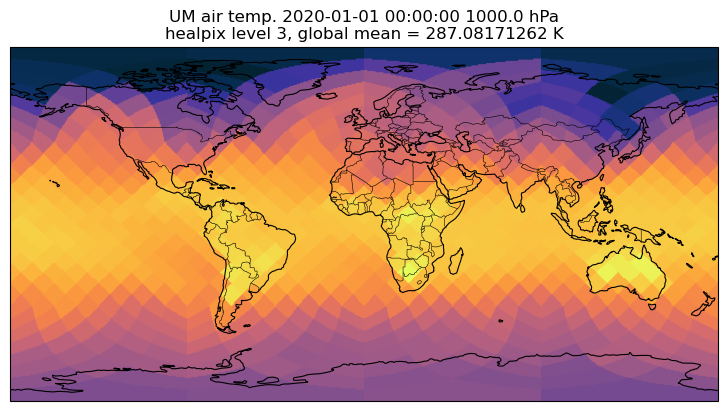

In [62]:
level = 3
da = ds.isel(time=0, pressure=-1)[f'air_temperature_{level}']
time = pd.Timestamp(da.time.values.item())
pressure = da.pressure.values.item()
fig, ax = plot_hp(da, f'UM air temp. {time} {pressure} hPa\nhealpix level {level}', 'K', dpi=100)

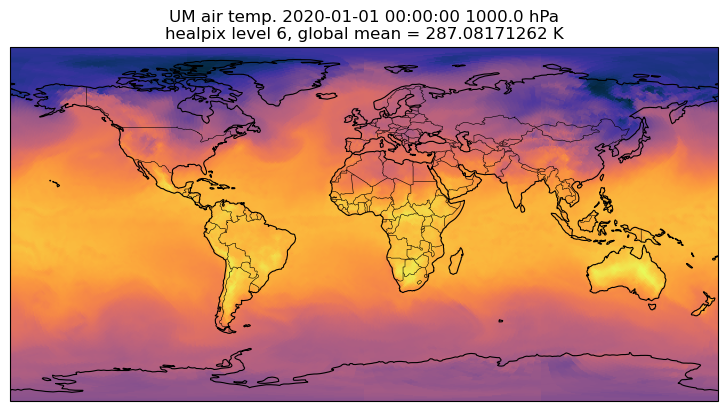

In [61]:
level = 6
da = ds.isel(time=0, pressure=-1)[f'air_temperature_{level}']
time = pd.Timestamp(da.time.values.item())
pressure = da.pressure.values.item()
fig, ax = plot_hp(da, f'UM air temp. {time} {pressure} hPa\nhealpix level {level}', 'K', dpi=100)

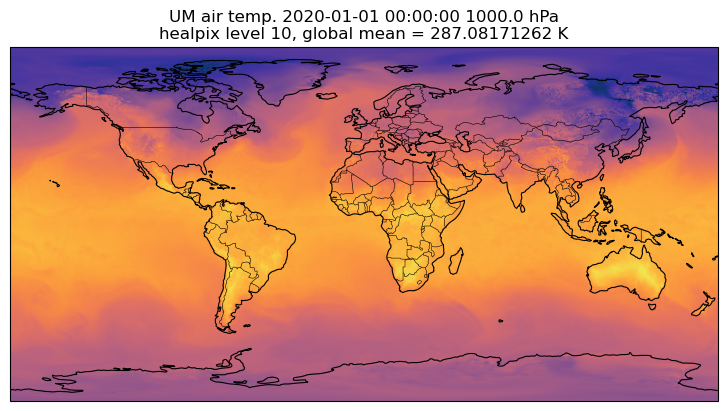

In [60]:
level = 10
da = ds.isel(time=0, pressure=-1)[f'air_temperature_{level}']
time = pd.Timestamp(da.time.values.item())
pressure = da.pressure.values.item()
fig, ax = plot_hp(da, f'UM air temp. {time} {pressure} hPa\nhealpix level {level}', 'K', dpi=100)
